In [26]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!pip install split-folders


In [29]:
import splitfolders
splitfolders.ratio(r"/content/drive/MyDrive/Rice leaf", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 124 files [00:47,  2.59 files/s]


In [30]:
# Sorting the path of data into veriable
train_dir = '/content/output/train'  #Location of training images
validation_dir = '/content/output/val' # Location of test images
test_dir ='/content/output/test' # Location of test images

In [31]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')









Found 99 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [32]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

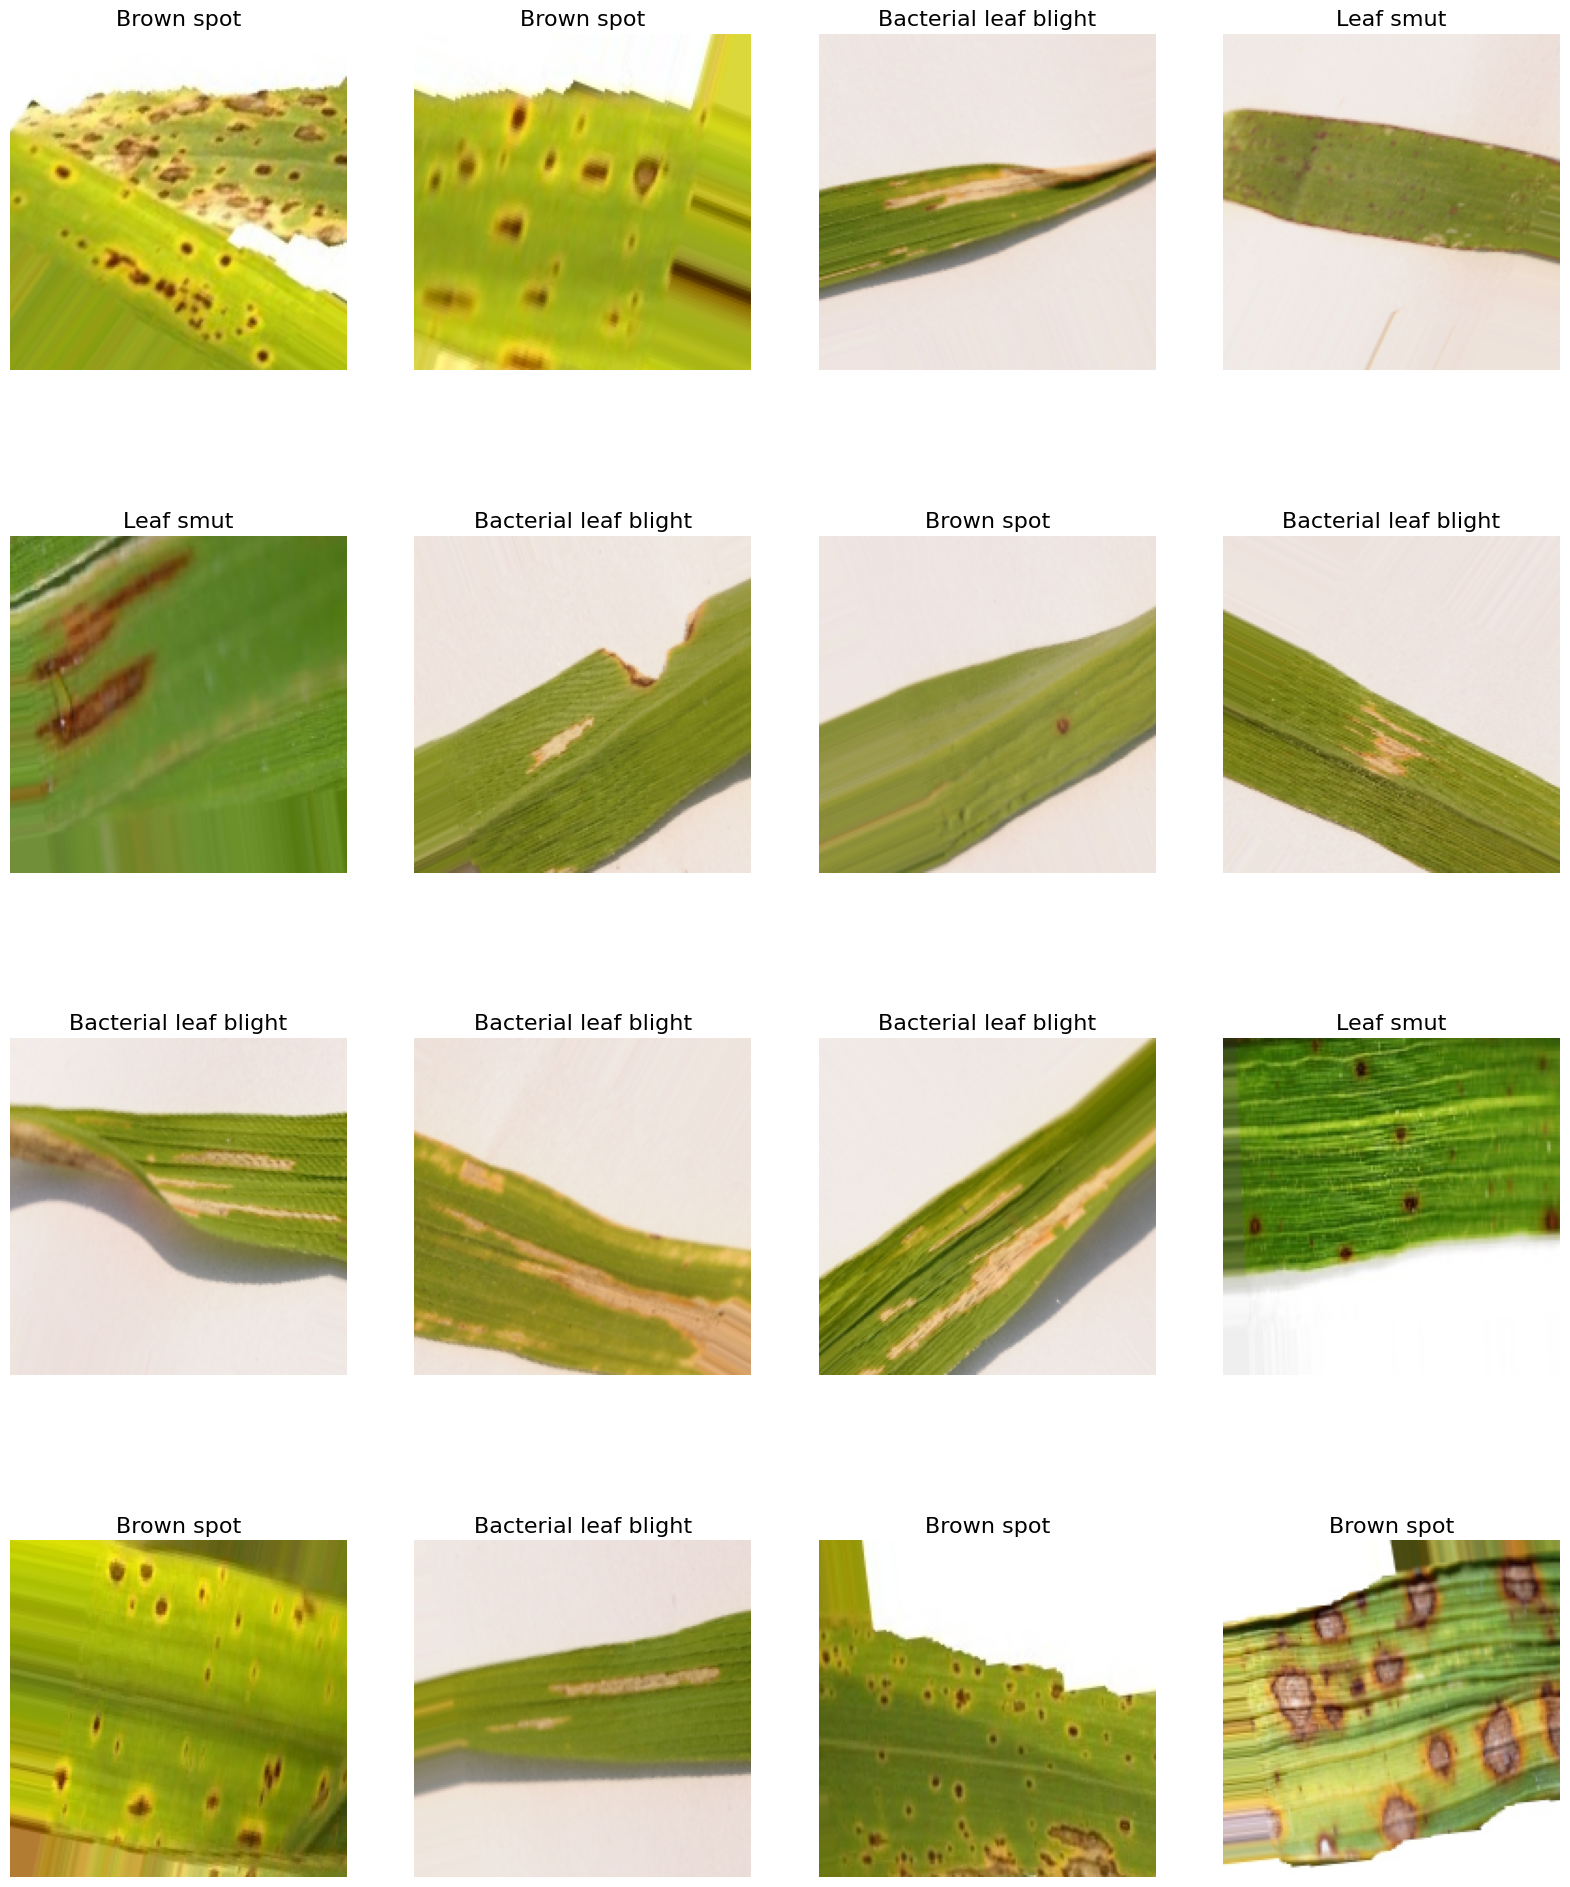

In [33]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)